In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import re

In [5]:
file_path = '/Users/apoorvashete/Desktop/STA220FinalProject-Yelp/final_reviews_data.json'
df = pd.read_json(file_path)
df

,Date,Review Text,Rating,Business ID
0,2024-03-03,Taco Mahal was a very unique experience. I've ...,5 star rating,SP4bvMvxel_UPdof_er3HA
1,2024-02-19,1/1 Ambience; 1.5/2 Food + Beverages; 1/1 Serv...,5 star rating,SP4bvMvxel_UPdof_er3HA
2,2024-02-04,delicious indian food and fast!! we ordered:- ...,5 star rating,SP4bvMvxel_UPdof_er3HA
3,2024-03-10,"We stopped by for a ""life-changing taco"" as pa...",5 star rating,SP4bvMvxel_UPdof_er3HA
4,2024-01-28,For those that know my reviews if there is any...,4 star rating,SP4bvMvxel_UPdof_er3HA
...,...,...,...,...
11945,2023-06-14,"Once you step into Mr Max, it feels as if you ...",5 star rating,P0VziPp_DuKBol_YNKLqSw
11946,2023-01-21,The restaurant setting is amazing. There is ei...,5 star rating,P0VziPp_DuKBol_YNKLqSw
11947,2024-01-26,Best restaurant in all of Dallas! I've been he...,5 star rating,P0VziPp_DuKBol_YNKLqSw
11948,2023-12-17,Limited seatings a total hole in a wall type o...,5 star rating,P0VziPp_DuKBol_YNKLqSw


In [6]:
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/apoorvashete/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/apoorvashete/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
def preprocess_text(text):

    text = text.lower()
    #remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    #tokenize text
    words = nltk.word_tokenize(text)
    #remove stop words and apply lemmatization & stemming
    words = [lemmatizer.lemmatize(word) for word in words if word.isalnum() and word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    
    return ' '.join(words)

In [8]:
df['processed_text'] = df['Review Text'].apply(preprocess_text)

In [9]:
#creating a tf-idf matrix
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_text'])

In [10]:
num_topics = 5 #looking for the top 5 topics of dicussion in the reviews
topic_names = ["good food", "service quality", "ambience", "value for money", "overall experience"]
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_matrix = lda.fit_transform(tfidf_matrix)

#displaying the top 10 words for each topic
feature_names = tfidf_vectorizer.get_feature_names_out()
num_top_words = 10

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    topic_name = topic_names[topic_idx]
    print(f"{topic_name}: {', '.join(top_words)}")

good food: chicken, food, indian, naan, good, order, curri, great, masala, flavor
service quality: mahi, sum, dim, fresca, menudo, spare, pakwan, pelon, agua, hong
ambience: food, great, good, servic, place, order, time, taco, restaur, love
value for money: dumpl, pizza, noodl, good, dan, pork, place, soup, oil, amaz
overall experience: ramen, sushi, roll, good, place, great, noodl, broth, pork, order


In [11]:
from wordcloud import WordCloud

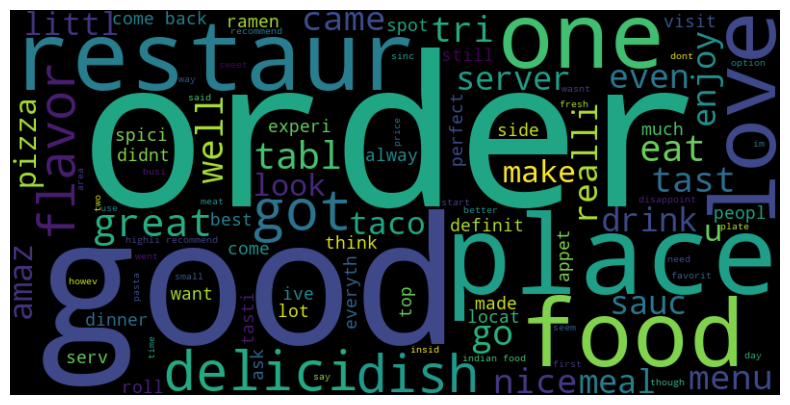

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df['processed_text'] is a Series of strings
all_words = ' '.join(df['processed_text'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, random_state=42, max_words=100).generate(all_words)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
